# Transfer Learning - Caltech101
Transfer learning using a pretrained Resnet18 on the Caltech101 dataset (without the background class). **90%** test accuracy achieved after training for two epochs.

In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import timm
from utils import get_output_shape, count_parameters, accuracy, train
from prettytable import PrettyTable

In [3]:
TRAIN_FOLDER = ".//data//caltech101//train//"
TEST_FOLDER = ".//data//caltech101//test//"

In [4]:
train_transforms = transforms.Compose([transforms.Resize((300, 300)), transforms.RandomCrop(size=(224, 224)), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
train_dataset = ImageFolder(TRAIN_FOLDER, train_transforms)
test_dataset = ImageFolder(TEST_FOLDER, test_transforms)

In [5]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

In [6]:
n_classes = len(train_dataset.classes)
n_classes

101

joshua_tree


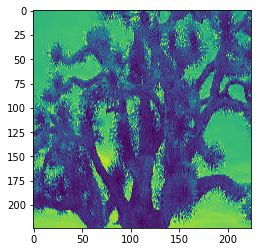

In [9]:
imgs, labels = next(iter(train_dataloader))
print(train_dataset.classes[labels[0]])
plt.imshow(imgs[0, 0])
plt.show()

In [18]:
resnet = timm.create_model("resnet18", pretrained=True)
for param in resnet.parameters():
    param.requires_grad = False
resnet.fc = nn.Linear(512, n_classes)

In [19]:
count_parameters(resnet)

+-----------+------------+
|  Modules  | Parameters |
+-----------+------------+
| fc.weight |   51712    |
|  fc.bias  |    101     |
+-----------+------------+
Total Trainable Params: 51813


51813

In [20]:
crit = nn.CrossEntropyLoss()
opt = optim.Adam(resnet.fc.parameters(), lr=0.01, weight_decay=0.0001)

In [21]:
train_loss, train_acc, test_loss, test_acc = train(resnet, crit, accuracy, opt, train_dataloader, test_dataloader, 5)


Epoch:1, T Loss:1.593, T acc:0.716 V Loss:0.724, V acc:0.856



Epoch:2, T Loss:0.673, T acc:0.862 V Loss:0.432, V acc:0.904



Epoch:3, T Loss:0.688, T acc:0.871 V Loss:0.307, V acc:0.931



Epoch:4, T Loss:0.593, T acc:0.890 V Loss:0.563, V acc:0.914



Epoch:5, T Loss:0.508, T acc:0.908 V Loss:0.252, V acc:0.944


In [28]:
table = PrettyTable(["Correct", "Prediction", "Correct Label"])
with torch.no_grad():
    resnet.eval()
    x_batch, y_batch = next(iter(train_dataloader))
    p = resnet(x_batch)
    v, i = p.max(axis=1)
    for pred, true in zip(i, y_batch):
        table.add_row([(pred==true).item(), train_dataset.classes[pred], train_dataset.classes[true]])
print(table)

+---------+-------------+---------------+
| Correct |  Prediction | Correct Label |
+---------+-------------+---------------+
|   True  |    mayfly   |     mayfly    |
|   True  |  chandelier |   chandelier  |
|   True  |     crab    |      crab     |
|   True  |  Motorbikes |   Motorbikes  |
|   True  |    brain    |     brain     |
|  False  |  sea_horse  |    menorah    |
|   True  |    rhino    |     rhino     |
|   True  |  dragonfly  |   dragonfly   |
|   True  |    pizza    |     pizza     |
|   True  |     crab    |      crab     |
|   True  |    buddha   |     buddha    |
|   True  | soccer_ball |  soccer_ball  |
|   True  |    ketch    |     ketch     |
|   True  |   flamingo  |    flamingo   |
|   True  |  Motorbikes |   Motorbikes  |
|   True  | grand_piano |  grand_piano  |
|   True  |   pyramid   |    pyramid    |
|   True  | stegosaurus |  stegosaurus  |
|   True  |  airplanes  |   airplanes   |
|   True  |   dolphin   |    dolphin    |
|   True  |  chandelier |   chande